In [123]:
# install pandas
%pip install pandas
%pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [124]:
# session 1 - 07.05.25 participants Hannah, Lena, Paula, Katharina
# 1 Data set selection 

import pandas as pd

# load data frame
df = pd.read_csv(r"alzheimerdata_with_missing_valuesv2.csv")

# get overview 
df.head()
df.info()

# number of columns and rows
df.shape
# we have 2149 rows and 35 columns

# culumn names
df.columns

# why did we choose this data frame?
# Information about the data set
# This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. 
# The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and 
# functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. The data is ideal for researchers and data 
# scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.

# contains numerical (AlcoholConsumption, PhysicalActivity, SleepQuality,...); categorical data (Gender, Ethnicity, EducationLevel, Smoking,...)
# includes more than 10 input variablen -> 34
# clearly defined target variable: Diagnosis (0 = no Alzheimer; 1 = Alzheimer)
# sufficient size -> 2149 rows
# complexity: medical, demographical and cognitive data

# suitability: cleary defined binary target variable; sufficient input variables (features), sufficient size

#drop unnecessary columns
unnecessary_columns=['PatientID','DoctorInCharge']
df = df.drop(columns=unnecessary_columns)
df.head()

#now our dataset has 33 columns left instead of 35

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        1620 non-null   float64
 2   Gender                     1955 non-null   float64
 3   Ethnicity                  1777 non-null   float64
 4   EducationLevel             1627 non-null   float64
 5   BMI                        1699 non-null   float64
 6   Smoking                    1569 non-null   float64
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           1678 non-null   float64
 9   DietQuality                1565 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    1911 non-null   float64
 12  CardiovascularDisease      1494 non-null   float64
 13  Diabetes                   1759 non-null   float

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73.0,0.0,0.0,2.0,NaN,0.0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0.0,0.0,1.725883,0.0,NaN,0.0,1.0,0.0,0
1,89.0,0.0,0.0,0.0,NaN,0.0,4.542524,7.619885,NaN,7.151293,...,7.118696,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1.0,0
2,73.0,NaN,3.0,1.0,17.795882,NaN,19.555085,7.844988,NaN,9.673574,...,5.895077,0.0,0.0,7.119548,0.0,1.0,0.0,1.0,0.0,0
3,NaN,1.0,0.0,NaN,NaN,1.0,12.209266,8.428001,7.435604,8.392554,...,8.965106,0.0,1.0,6.481226,0.0,0.0,0.0,0.0,0.0,0
4,89.0,NaN,0.0,0.0,20.716974,NaN,18.454356,6.310461,0.795498,5.597238,...,6.045039,0.0,NaN,0.014691,0.0,0.0,1.0,1.0,NaN,0


In [125]:
# limitations:
# missing values?
print(df.isnull().values.sum())
# we have 9231 missing values

# ethical considerations
# sensitive data including phyical and medical health indicators - e.g. Alzheimer, Ethnicity, Depression 

# potential bias possible in ethnicity as the mayority is caucasian 
# Also distribution in just 4 ethnicity groups shows possible limitation of the data
# gender seems to be equally distributed


# Check demografic variables
gender_distribution = df['Gender'].value_counts()
age_distribution = df['Age'].describe()  # Geben Sie eine Zusammenfassung des Alters

# check for bias
print("Geschlechterverteilung:\n", gender_distribution)
print("\nAltersverteilung:\n", age_distribution)

9231
Geschlechterverteilung:
 Gender
1.0    987
0.0    968
Name: count, dtype: int64

Altersverteilung:
 count    1620.000000
mean       74.995062
std         8.915774
min        60.000000
25%        68.000000
50%        75.000000
75%        83.000000
max        90.000000
Name: Age, dtype: float64


In [126]:
# Task 2 EDA (participants: Lena, Hannah, Paula, Katharina date: 14.05.25)

# statistics of data
# print(df.dtypes)
column_numerical = ['Age', 'BMI', "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment", "ADL"]
# df[column_numerical].mean()

statistic_df = pd.DataFrame({
    'Mittelwert': df[column_numerical].mean(),
    'Median': df[column_numerical].median(),
    'SD': df[column_numerical].std()
})

print(statistic_df)

# missingness rates
# count missing values in df
print(df.isnull().values.sum())

# Check across each column
df.isnull().any()

# Check if missing values in each column
df.isna().sum().sort_values(ascending=False)


                          Mittelwert      Median          SD
Age                        74.995062   75.000000    8.915774
BMI                        27.733405   27.860727    7.214591
AlcoholConsumption         10.039442    9.934412    5.757910
PhysicalActivity            4.910309    4.719842    2.860746
DietQuality                 4.927170    5.041911    2.903059
SleepQuality                7.051081    7.115646    1.763573
SystolicBP                134.419463  134.000000   25.924498
DiastolicBP                89.810432   90.000000   17.514335
CholesterolTotal          225.197519  225.086430   42.542233
CholesterolLDL            124.213688  123.164962   43.383385
CholesterolHDL             59.393013   59.820570   23.198110
CholesterolTriglycerides  228.281496  230.301983  101.986721
MMSE                       14.757445   14.469000    8.613452
FunctionalAssessment        5.079990    5.034020    2.889747
ADL                         4.982814    5.023334    2.932299
9231


Depression                   691
CardiovascularDisease        655
BehavioralProblems           625
DietQuality                  584
Smoking                      580
HeadInjury                   552
Age                          529
EducationLevel               522
PhysicalActivity             471
BMI                          450
FunctionalAssessment         425
Disorientation               409
Diabetes                     390
Ethnicity                    372
DiastolicBP                  366
FamilyHistoryAlzheimers      238
CholesterolHDL               223
ADL                          213
Gender                       194
PersonalityChanges           172
Forgetfulness                154
CholesterolLDL               130
Hypertension                  77
MMSE                          68
SystolicBP                    63
DifficultyCompletingTasks     43
MemoryComplaints              35
CholesterolTriglycerides       0
Confusion                      0
CholesterolTotal               0
SleepQuali

In [127]:
%pip install missingno==0.5.2
import missingno as msno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

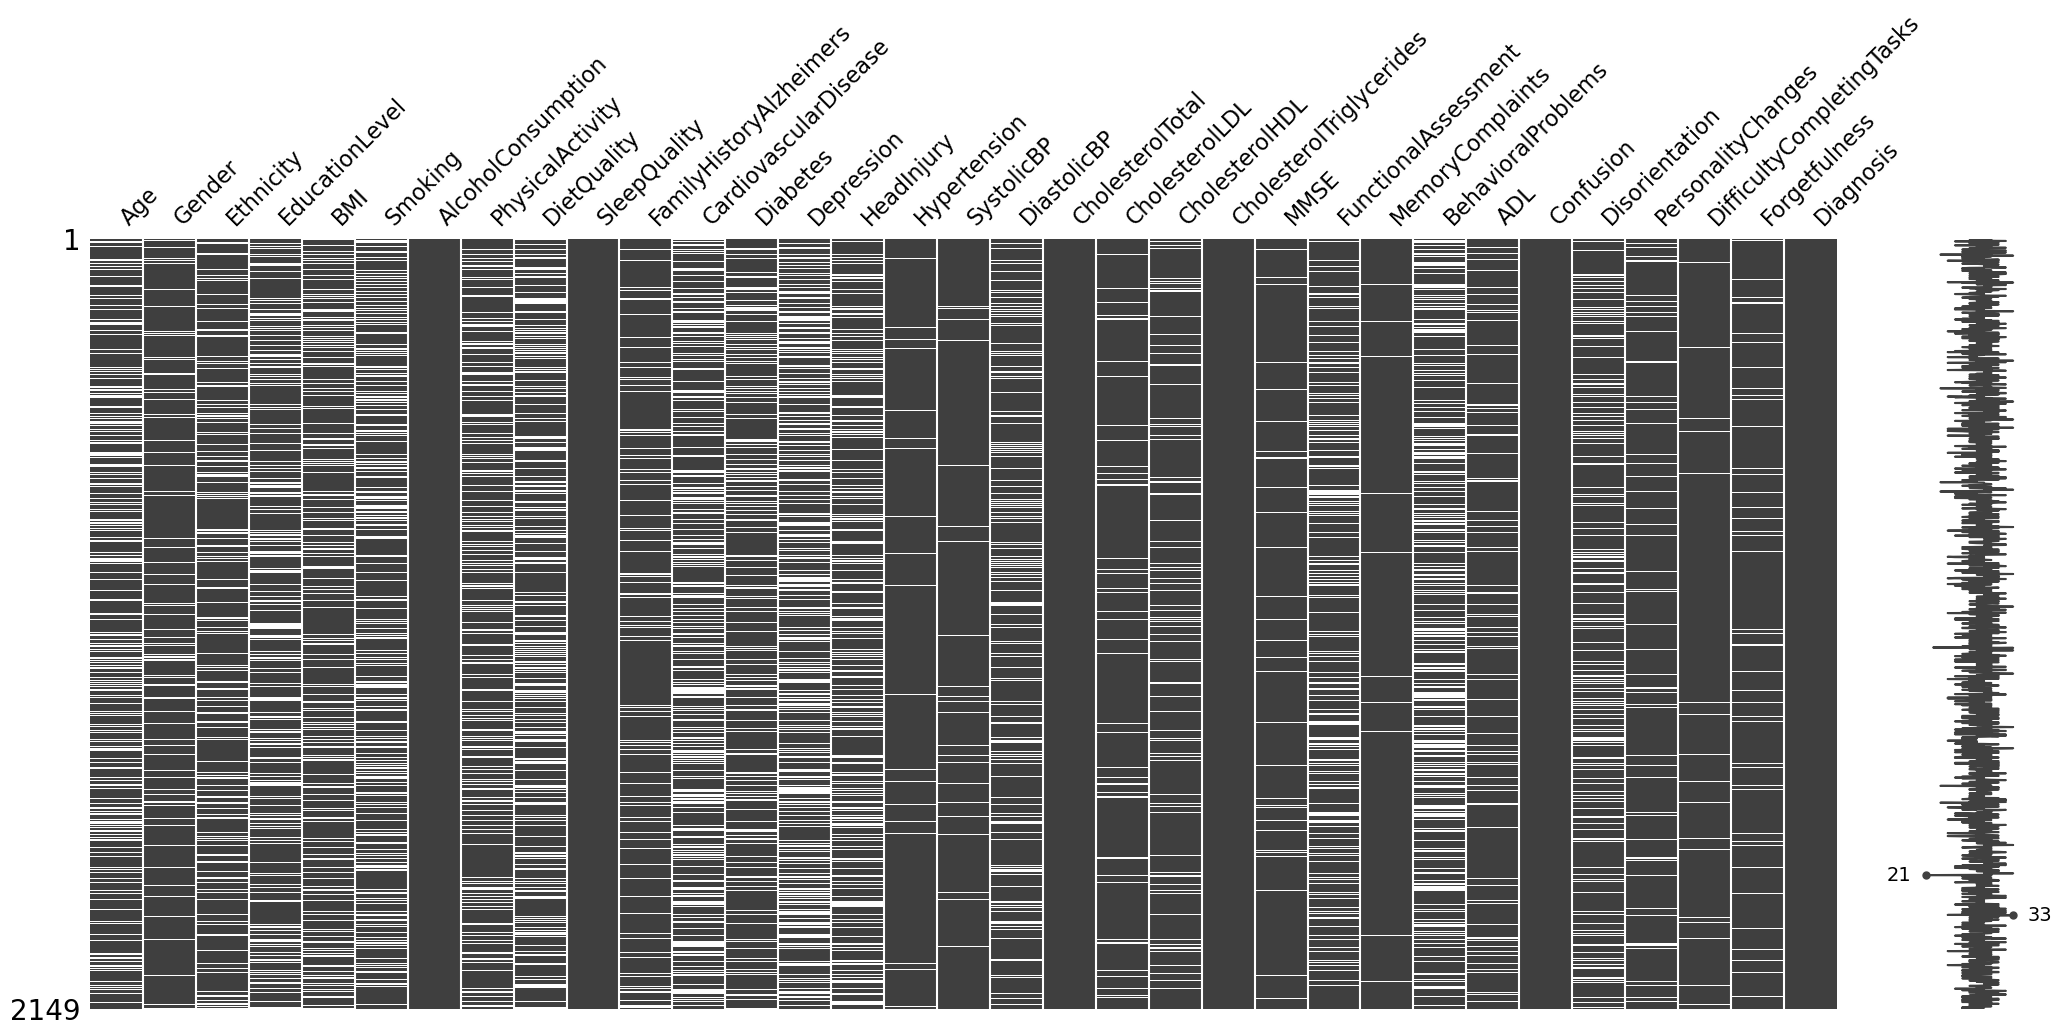

In [128]:
#Visualize missing values as a matrix
msno.matrix(df)



<Axes: >

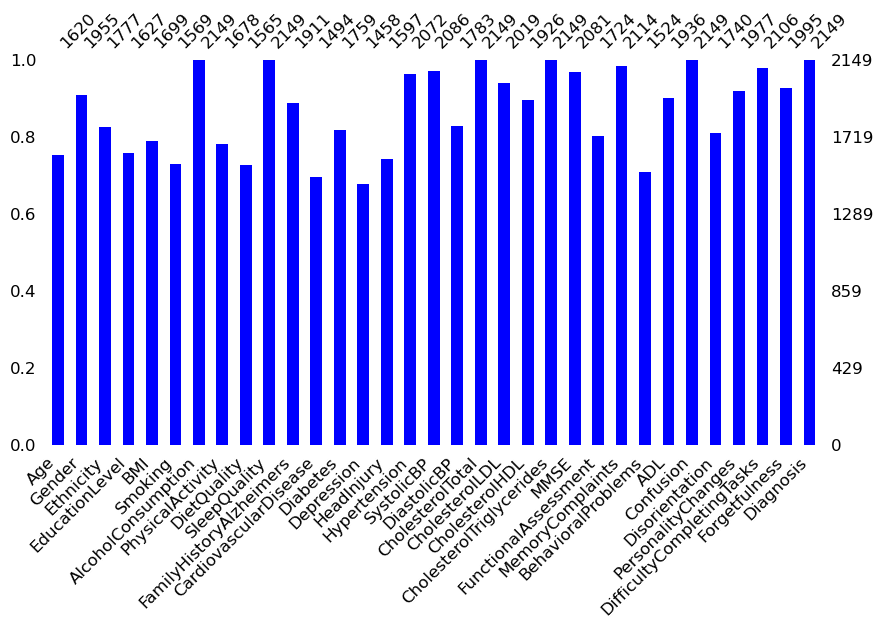

In [129]:
#Visualize missing values as a bar
msno.bar(df, figsize=(10, 5), fontsize=12,
color='blue')

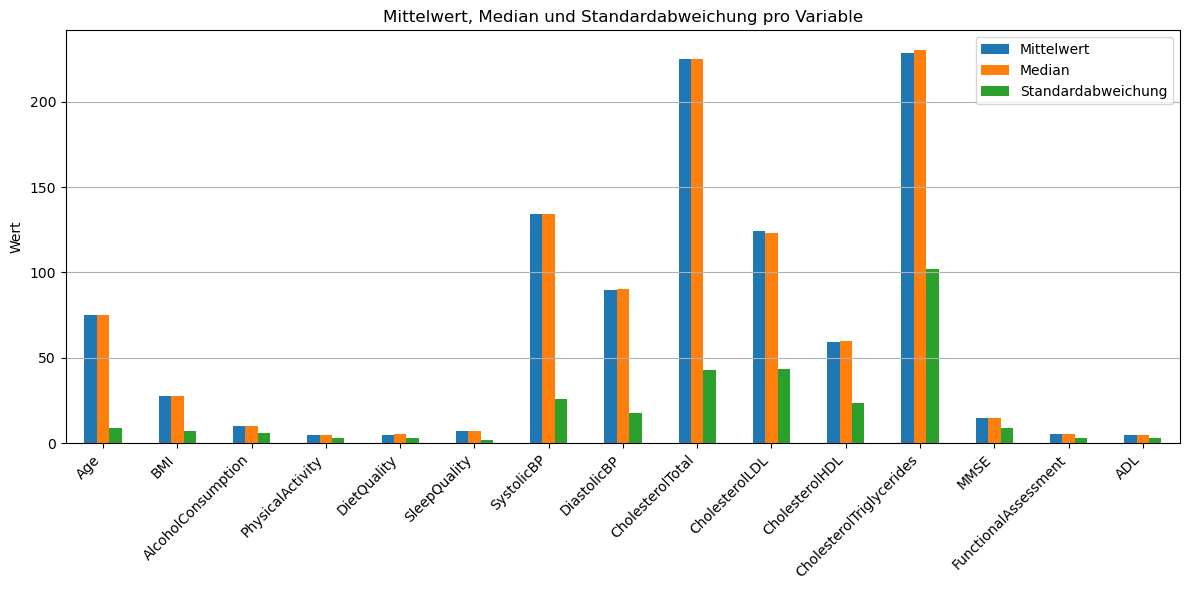

In [130]:
# Statistiken berechnen
means = df[column_numerical].mean()
medians = df[column_numerical].median()
stds = df[column_numerical].std()

# Kombinieren in ein DataFrame für die Visualisierung
stat_df = pd.DataFrame({
    'Mittelwert': means,
    'Median': medians,
    'Standardabweichung': stds
})

# Plotten
stat_df.plot(kind='bar', figsize=(12, 6))
plt.title('Mittelwert, Median und Standardabweichung pro Variable')
plt.ylabel('Wert')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [131]:
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


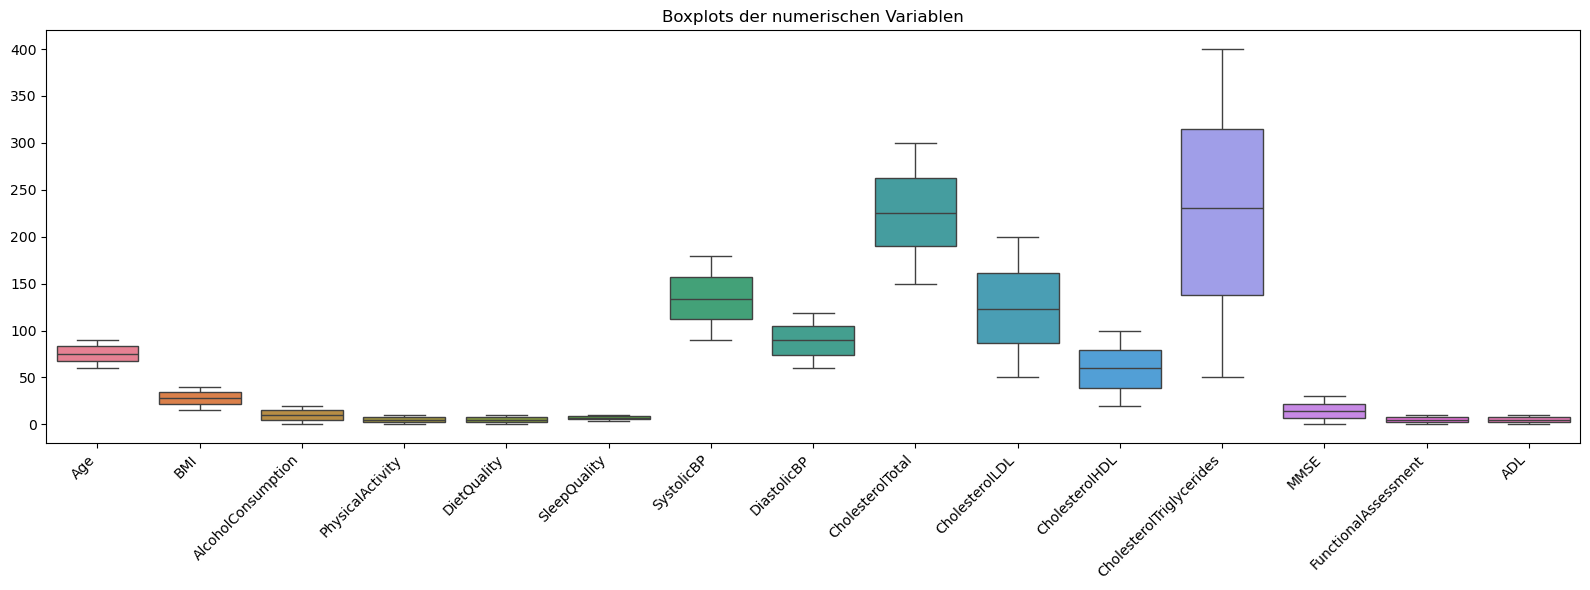

In [132]:
# visualize mean median sd in boxplots
# sns.boxplot(df[column_numerical]) # but we want it nicer

# set figure size
plt.figure(figsize=(16, 6)) 

sns.boxplot(data=df[column_numerical])

# make it nice
plt.xticks(rotation=45, ha='right')  # turns y values
plt.title('Boxplots der numerischen Variablen')
plt.tight_layout()
plt.show()

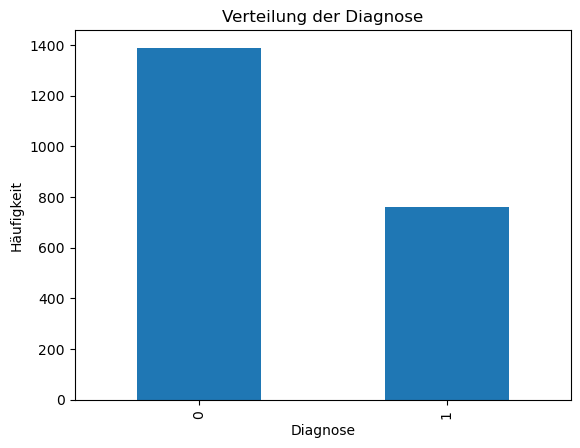

1389
760


In [133]:
# Analysis of the target variable
# --> Class distribution because target value is 0 or 1 (with or without alzheimer)

# show distribution of target variable alzheimer
df['Diagnosis'].value_counts().plot(kind='bar')
plt.title('Verteilung der Diagnose')
plt.xlabel('Diagnose')
plt.ylabel('Häufigkeit')
plt.show()
# more without alzheimer than with

# count how many people with and without alzheimer (Diagnosis == 0 / Diagnosis == 1)
print(df[df['Diagnosis'] == 0].shape[0])
print(df[df['Diagnosis'] == 1].shape[0])
# there is more without alzheimer: 951 than with: 531
# there is a clear class imbalance
# this imbalance can negatively affect classification performance, particularly if a model learns to overpredict the 
# majority class (e.g., always guessing "no Alzheimer" to boost accuracy).

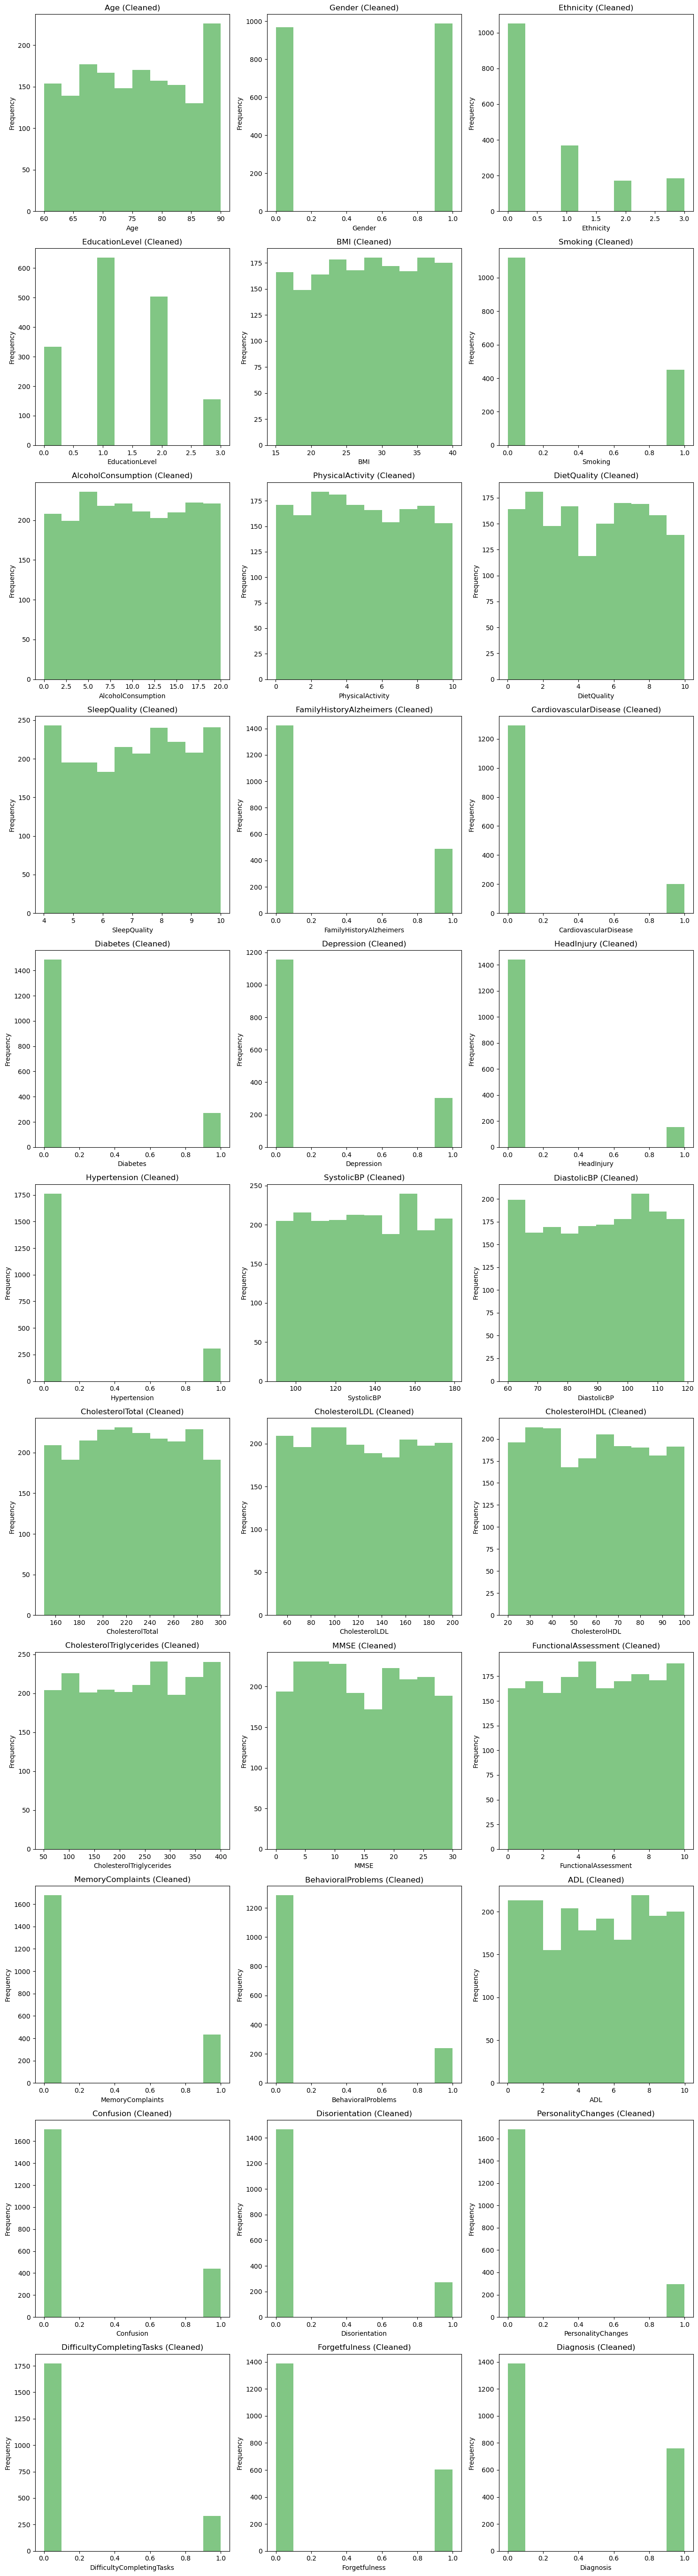

In [134]:
# outliers

# Get the Descriptive Statistics
df.describe()
df["SystolicBP"].describe()

# no inplausible values found

# Load Library
import math
import matplotlib.pyplot as plt
import seaborn as sns
# Set up Plotting
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
n = len(numerical_columns)
nrows = math.ceil(n / 3)
# Histograms
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
axes = axes.flatten()

# Load Library
for i, column in enumerate(numerical_columns):
    axes[i].hist(df[column].dropna(), bins=10, alpha=0.7, color="#4CAF50")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f"{column} (Cleaned)")
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

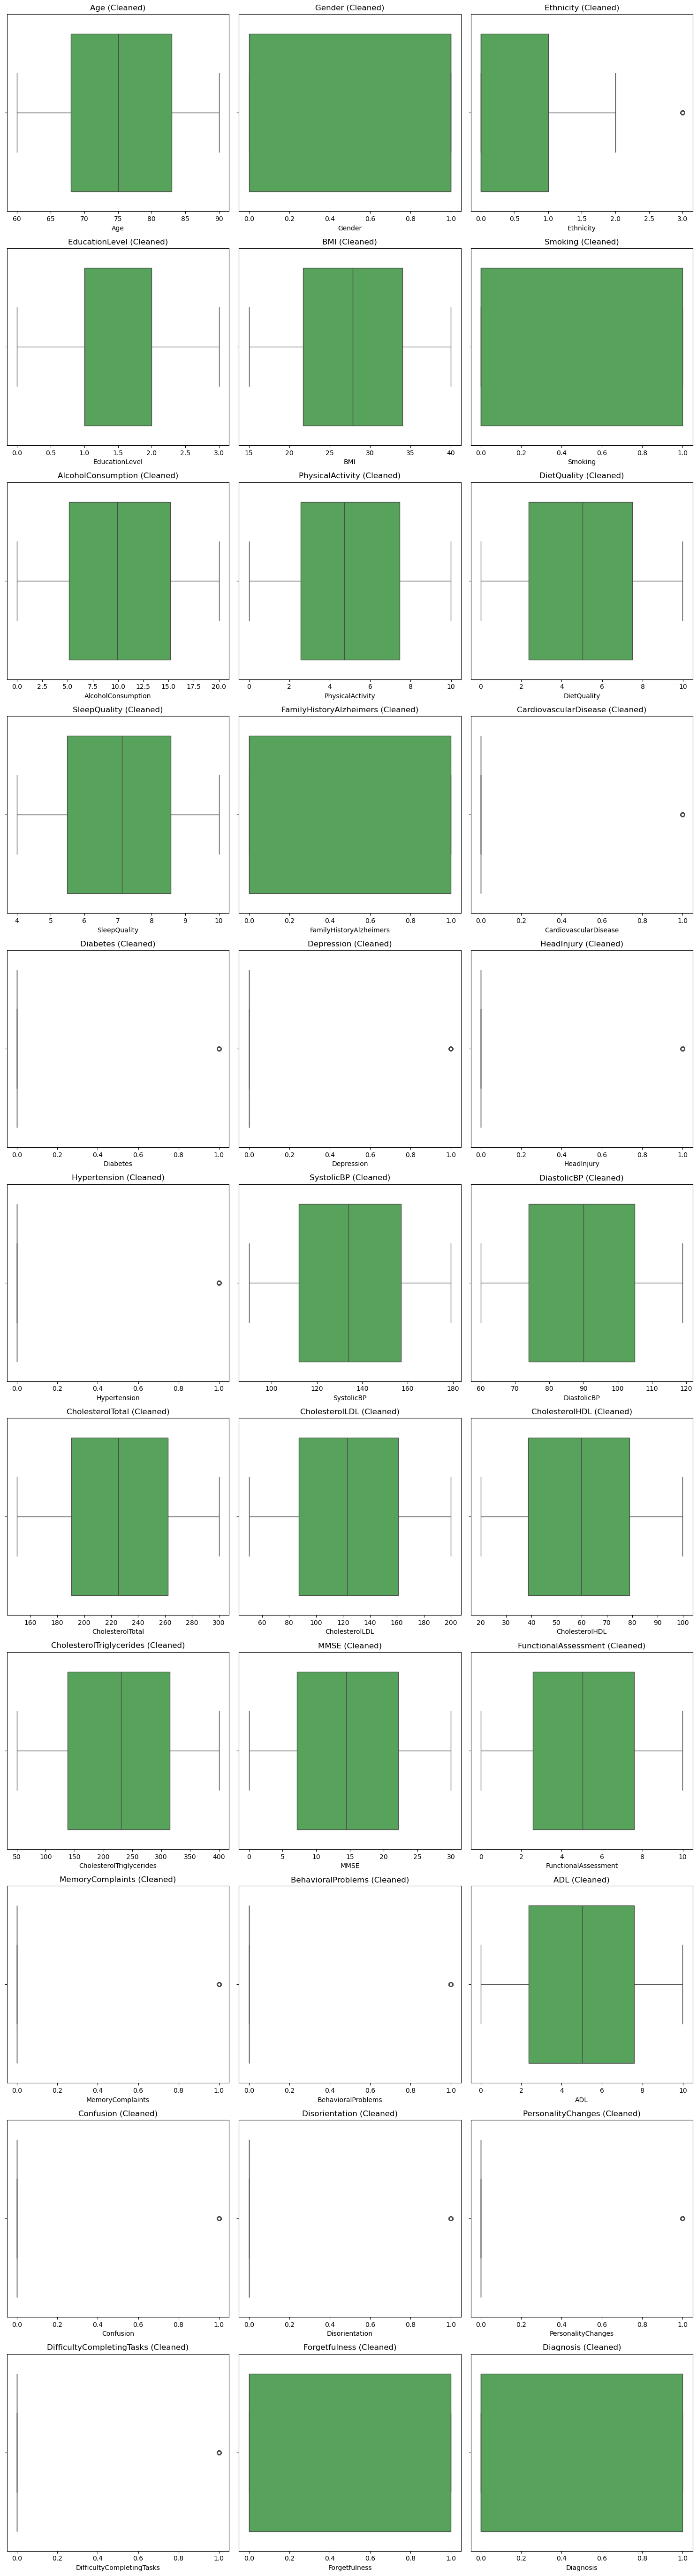

In [135]:
# Boxplots
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i], orient='h', color="#4CAF50")
    axes[i].set_title(f"{column} (Cleaned)")
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

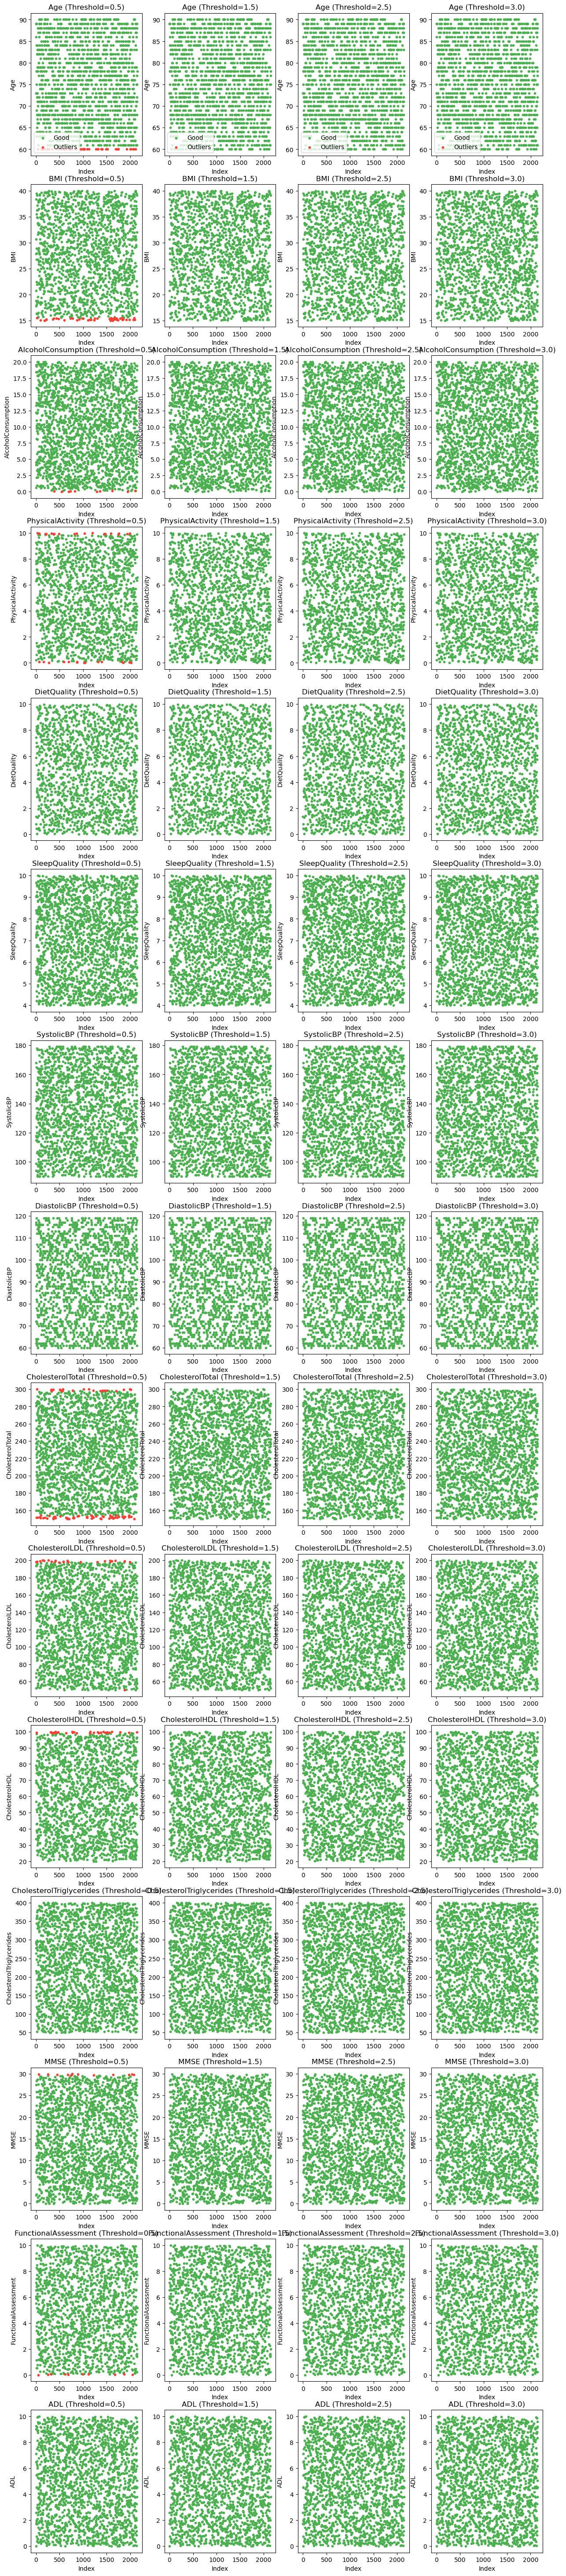

In [136]:
# # Specify columns to check for outliers
columns_to_check = column_numerical
# Create a function to calculate IQR-based outliers
def iqr_outliers(series, threshold=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return (series < lower_bound) | (series > upper_bound)

# Function to visualize outliers at different thresholds
def visualize_iqr_thresholds(df, columns, thresholds):
    plt.figure(figsize=(15, len(columns) * 5))
    for i, column in enumerate(columns, 1):
        for j, threshold in enumerate(thresholds, 1):
            plt.subplot(len(columns), len(thresholds), (i - 1) * len(thresholds) + j)
            outliers = iqr_outliers(df[column], threshold=threshold)    
            plt.scatter(df.index[~outliers], df[column][~outliers], s=10, label="Good", color="#4CAF50")
            plt.scatter(df.index[outliers], df[column][outliers], s=10, label="Outliers", color="#F44336")
            plt.title(f"{column} (Threshold={threshold})")
            plt.xlabel("Index")
            plt.ylabel(column)
            if i == 1:
                plt.legend()
plt.tight_layout()
plt.show()

# Define thresholds to visualize
iqr_thresholds = [0.5, 1.5, 2.5, 3.0]
# Visualize outliers at different thresholds
visualize_iqr_thresholds(df, columns_to_check , iqr_thresholds)

#our scatterplots show that we do not have any significant outliers in any numerical variable
#this is why we decided to keep all the data without removing any outliers

In [137]:
#column-wise deletion
# we want to see if there are any columns with too much missing data

# Calculate the percentage of missing values for each column
missing_percentage = df.isna().mean() * 100
# Sort the missing percentage in descending order
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)
# Print the percentage of missing values
print("Percentage of missing values for each column:")
print(missing_percentage)

# CardiovascularDisease and Depression have more than 30% missing values so we dont want to touch those.

Percentage of missing values for each column:
Age                          24.616101
Gender                        9.027455
Ethnicity                    17.310377
EducationLevel               24.290368
BMI                          20.939972
Smoking                      26.989297
AlcoholConsumption            0.000000
PhysicalActivity             21.917171
DietQuality                  27.175430
SleepQuality                  0.000000
FamilyHistoryAlzheimers      11.074919
CardiovascularDisease        30.479293
Diabetes                     18.147976
Depression                   32.154490
HeadInjury                   25.686366
Hypertension                  3.583062
SystolicBP                    2.931596
DiastolicBP                  17.031177
CholesterolTotal              0.000000
CholesterolLDL                6.049325
CholesterolHDL               10.376919
CholesterolTriglycerides      0.000000
MMSE                          3.164262
FunctionalAssessment         19.776640
MemoryComplaints  

In [ ]:
# missing values treatment
# MICE

# need to enable iterative imputer explicitly since its still experimental
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#tried to do MICE for categorial columns, but it did not work 
#df_your_cat_column = ['Diagnosis','Forgetfulness','DifficultyCompletingTasks','PersonalityChanges','Disorientation','Confusion','BehavioralProblems','MemoryComplaints','Hypertension','HeadInjury','Depression','Diabetes','CardiovascularDisease','FamilyHistoryAlzheimers','Smoking','EducationLevel','Ethnicity','Gender']
#print(len(df_your_cat_column))

#df[df[df_your_cat_column]] = df[df[df_your_cat_column]].astype('category')

df_train = df[column_numerical].copy()
df_train.head()

# Define imputer
imputer = IterativeImputer(random_state=100, max_iter=10)
# fit on the dataset
imputer.fit(df_train)
# Predict the missing values
df_imputed = imputer.transform(df_train)
df_imputed[:10]

# Replace with imputed values
df.loc[:, column_numerical] = df_imputed
df.head(10)


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73.000000,0.0,0.0,2.0,27.758801,0.0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0.0,0.0,1.725883,0.0,NaN,0.0,1.0,0.0,0
1,89.000000,0.0,0.0,0.0,27.737316,0.0,4.542524,7.619885,4.867441,7.151293,...,7.118696,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1.0,0
2,73.000000,NaN,3.0,1.0,17.795882,NaN,19.555085,7.844988,4.796983,9.673574,...,5.895077,0.0,0.0,7.119548,0.0,1.0,0.0,1.0,0.0,0
3,74.943689,1.0,0.0,NaN,27.692523,1.0,12.209266,8.428001,7.435604,8.392554,...,8.965106,0.0,1.0,6.481226,0.0,0.0,0.0,0.0,0.0,0
4,89.000000,NaN,0.0,0.0,20.716974,NaN,18.454356,6.310461,0.795498,5.597238,...,6.045039,0.0,NaN,0.014691,0.0,0.0,1.0,1.0,NaN,0
5,86.000000,1.0,1.0,1.0,30.626886,0.0,4.140144,0.211062,4.816755,7.261953,...,5.510144,0.0,0.0,9.015686,1.0,0.0,0.0,0.0,0.0,0
6,74.966602,0.0,3.0,2.0,38.387622,NaN,0.646047,9.257695,5.897388,5.477686,...,5.084584,0.0,NaN,9.236328,0.0,NaN,0.0,0.0,1.0,0
7,75.000000,0.0,NaN,1.0,18.776009,NaN,13.723826,4.649451,5.009078,4.213210,...,3.401374,0.0,0.0,4.517248,1.0,0.0,0.0,0.0,1.0,1
8,75.080601,1.0,1.0,0.0,27.833188,NaN,12.167848,1.531360,6.736882,5.748224,...,7.396061,0.0,1.0,0.756232,0.0,0.0,1.0,NaN,NaN,0
9,75.060585,0.0,NaN,0.0,35.456302,NaN,16.028688,6.440773,8.086019,7.551773,...,1.148904,0.0,NaN,4.554394,0.0,0.0,0.0,0.0,0.0,0


In [148]:
!pip3 install -U scikit-learn
!pip3 install miceforest --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.2 MB/s eta 0:00:00


In [ ]:
# multiple imputation by chained equation (MICE) with LightGBM using miceforest

import miceforest as mf

#Convert object columns to categorical
text_cols = df.select_dtypes(include=['object'])
for col in text_cols:
    df[col] = df[col].astype('category')
# Create kernel .
kds = mf.ImputationKernel(df, random_state=100)

# Run the MICE algorithm for 2 iterations
kds.mice(2)
# Return the completed dataset.
df_imputed = kds.complete_data()
df_imputed.head(10)


# Run the MICE algorithm for 5 iterations
kds.mice(iterations=5, n_estimators=50)
# Check how this changes the prediction
df_imputed2 = kds.complete_data()
df_imputed.head(6)
df_imputed2.head(6)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_Label
0,73.000000,0.0,0.0,2.0,27.758801,0.0,13.297218,6.327112,1.347214,9.025679,...,0.0,0.0,1.725883,0.0,0.0,0.0,1.0,0.0,0,Caucasian
1,89.000000,0.0,0.0,0.0,27.737316,0.0,4.542524,7.619885,4.867441,7.151293,...,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1.0,0,Caucasian
2,73.000000,0.0,3.0,1.0,17.795882,0.0,19.555085,7.844988,4.796983,9.673574,...,0.0,0.0,7.119548,0.0,1.0,0.0,1.0,0.0,0,Other
3,74.943689,1.0,0.0,1.0,27.692523,1.0,12.209266,8.428001,7.435604,8.392554,...,0.0,1.0,6.481226,0.0,0.0,0.0,0.0,0.0,0,Caucasian
4,89.000000,1.0,0.0,0.0,20.716974,1.0,18.454356,6.310461,0.795498,5.597238,...,0.0,0.0,0.014691,0.0,0.0,1.0,1.0,0.0,0,Caucasian
5,86.000000,1.0,1.0,1.0,30.626886,0.0,4.140144,0.211062,4.816755,7.261953,...,0.0,0.0,9.015686,1.0,0.0,0.0,0.0,0.0,0,African American


In [155]:
df_imputed2.isnull().sum().sum()

0

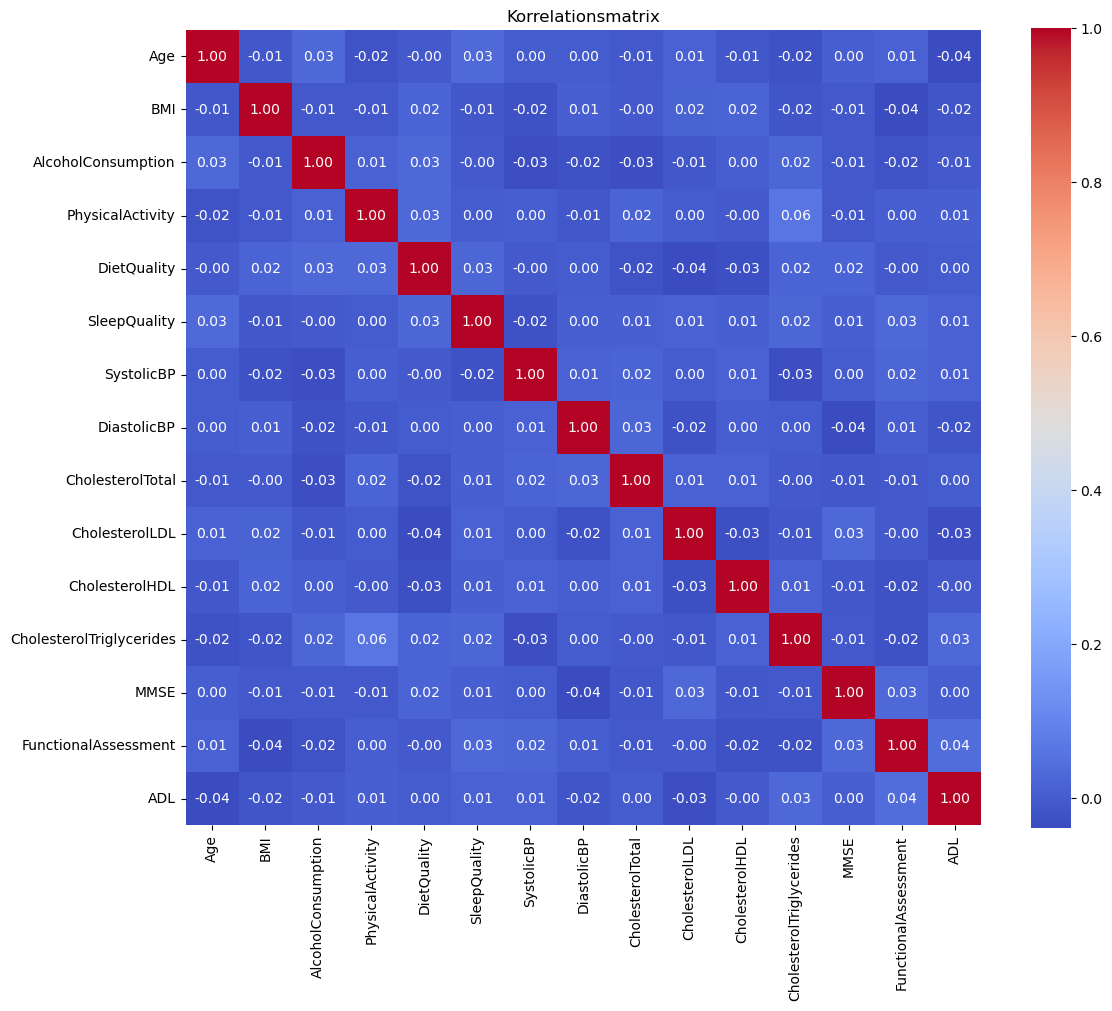

In [139]:
# correlation matrix
# only numerical
df_numeric = df[column_numerical] 

# Korrelationsmatrix berechnen
corr_matrix = df_numeric.corr()

# Heatmap plotten
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Korrelationsmatrix')
plt.tight_layout()
plt.show()

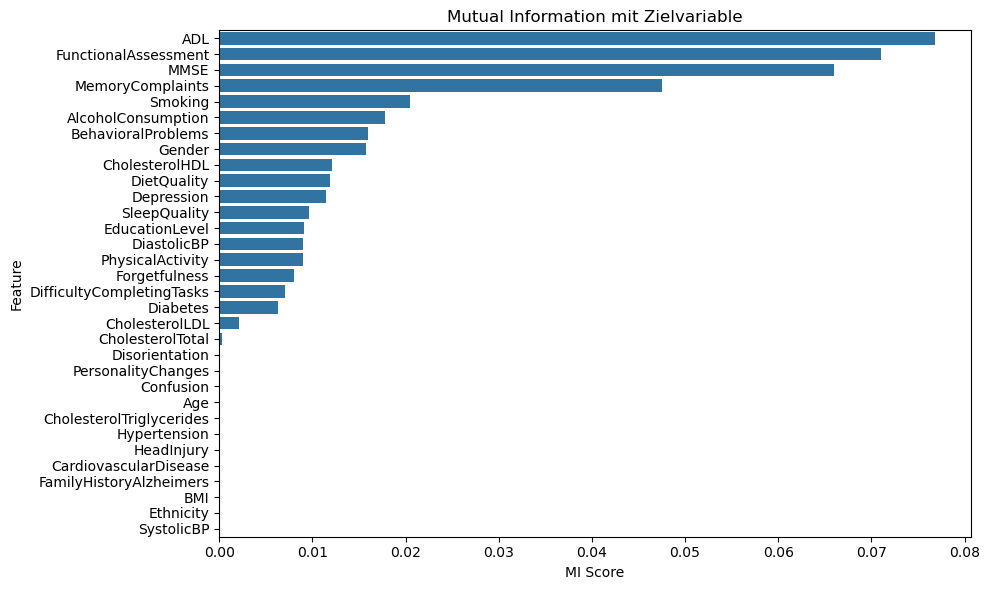

In [140]:
# Automatisch typisieren
numerical = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Wenn du weißt, dass 0/1-Variablen auch als numerisch gespeichert sind:
binary = [col for col in numerical if df[col].dropna().nunique() <= 2]
continuous = [col for col in numerical if col not in binary]


from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Zielvariable
y = df['Diagnosis']

# Alle Features (vorher Kategorisches codieren)
X = df.drop(columns=['Diagnosis']).copy()
for col in X.select_dtypes(include='object'):
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

X = X.fillna(0)

mi = mutual_info_classif(X, y, discrete_features='auto', random_state=0)

import pandas as pd
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi}).sort_values(by='MI Score', ascending=False)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df, x='MI Score', y='Feature')
plt.title('Mutual Information mit Zielvariable')
plt.tight_layout()
plt.show()

# very small correlations

In [141]:
from scipy.stats import chi2_contingency

for col in binary:
    ct = pd.crosstab(df[col], df['Diagnosis'])
    chi2, p, _, _ = chi2_contingency(ct)
    print(f"{col}: p-Wert = {p:.4f} {'(signifikant)' if p < 0.05 else ''}")

# significant: MemoryComplaints,BehavioralProblems


Gender: p-Wert = 0.4020 
Smoking: p-Wert = 0.5728 
FamilyHistoryAlzheimers: p-Wert = 0.1926 
CardiovascularDisease: p-Wert = 0.5875 
Diabetes: p-Wert = 0.4526 
Depression: p-Wert = 0.7065 
HeadInjury: p-Wert = 0.4179 
Hypertension: p-Wert = 0.1673 
MemoryComplaints: p-Wert = 0.0000 (signifikant)
BehavioralProblems: p-Wert = 0.0000 (signifikant)
Confusion: p-Wert = 0.4045 
Disorientation: p-Wert = 0.5125 
PersonalityChanges: p-Wert = 0.7370 
DifficultyCompletingTasks: p-Wert = 0.9264 
Forgetfulness: p-Wert = 1.0000 
Diagnosis: p-Wert = 0.0000 (signifikant)


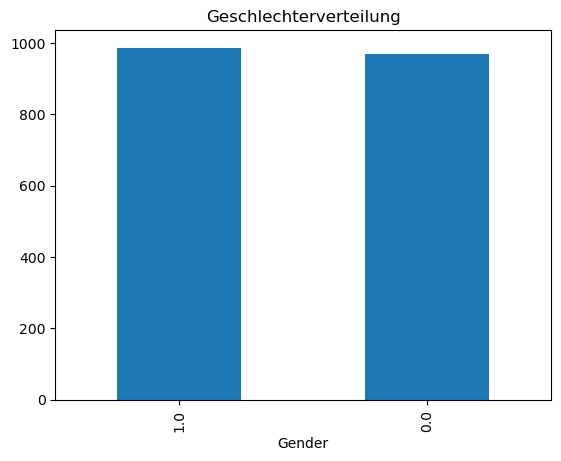

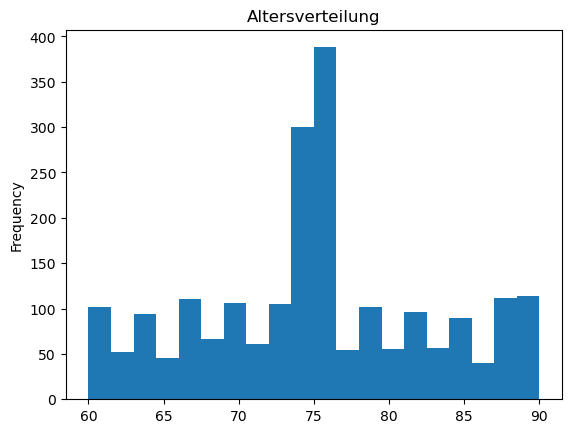

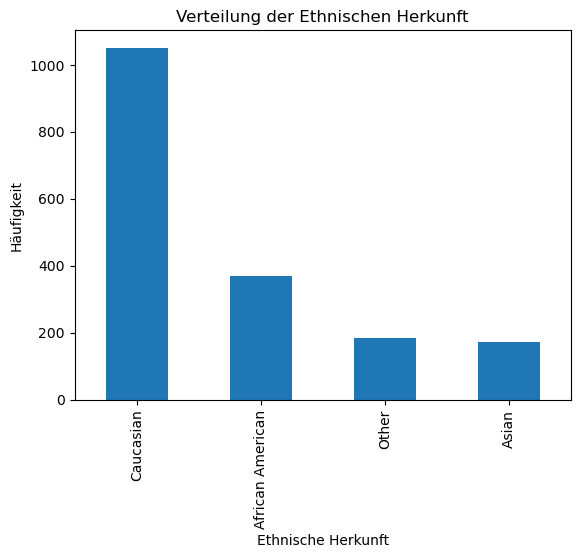

In [142]:
# further look into possible inbalances

# show gender distribution
df['Gender'].value_counts().plot(kind='bar', title="Geschlechterverteilung")
plt.show()

# show age distribution
df['Age'].plot(kind='hist', bins=20, title="Altersverteilung")
plt.show()


# Mapping numerical values to the ethnicity values
ethnicity_mapping = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

# Add column Ethnicity_Label
df['Ethnicity_Label'] = df['Ethnicity'].map(ethnicity_mapping)

# plot
df['Ethnicity_Label'].value_counts().plot(kind='bar', title="Verteilung der Ethnischen Herkunft")
plt.xlabel('Ethnische Herkunft')
plt.ylabel('Häufigkeit')
plt.show()

In [143]:
#

